In [12]:
!pip3 install pandas
!pip3 install prophet

In [13]:
import pandas as pd
from prophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
import requests

In [14]:
df = pd.read_csv('./london_weather.csv')

In [15]:
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [17]:
def convert_int_to_datetime(date_int):
    date_str = str(date_int)
    return datetime.strptime(date_str, '%Y%m%d')

df['date'] = df['date'].apply(convert_int_to_datetime)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [18]:
mean_df = df[['date', 'mean_temp']]
mean_df = mean_df.rename(columns={'date':'ds', 'mean_temp': 'y'})

In [19]:
mean_df

,ds,y
0,1979-01-01,-4.1
1,1979-01-02,-2.6
2,1979-01-03,-2.8
3,1979-01-04,-2.6
4,1979-01-05,-0.8
...,...,...
15336,2020-12-27,7.5
15337,2020-12-28,1.1
15338,2020-12-29,2.6
15339,2020-12-30,2.7


In [20]:
model = Prophet()
model.fit(mean_df)
future = model.make_future_dataframe(periods=1826)

21:45:16 - cmdstanpy - INFO - Chain [1] start processing
21:45:25 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future

In [22]:
forecast = model.predict(future)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1979-01-01,10.104267,0.652440,7.853820,10.104267,10.104267,-5.967724,-5.967724,-5.967724,-0.009022,-0.009022,-0.009022,-5.958701,-5.958701,-5.958701,0.0,0.0,0.0,4.136543
1,1979-01-02,10.104691,0.294397,7.832959,10.104691,10.104691,-6.015527,-6.015527,-6.015527,-0.020544,-0.020544,-0.020544,-5.994983,-5.994983,-5.994983,0.0,0.0,0.0,4.089164
2,1979-01-03,10.105116,0.696206,7.768946,10.105116,10.105116,-5.986756,-5.986756,-5.986756,0.045490,0.045490,0.045490,-6.032247,-6.032247,-6.032247,0.0,0.0,0.0,4.118359
3,1979-01-04,10.105540,0.442057,7.791456,10.105540,10.105540,-6.045966,-6.045966,-6.045966,0.024049,0.024049,0.024049,-6.070015,-6.070015,-6.070015,0.0,0.0,0.0,4.059574
4,1979-01-05,10.105964,0.348925,7.242323,10.105964,10.105964,-6.115902,-6.115902,-6.115902,-0.008126,-0.008126,-0.008126,-6.107776,-6.107776,-6.107776,0.0,0.0,0.0,3.990062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17126,2025-12-27,13.259713,3.707788,11.081110,12.816350,13.711888,-5.840103,-5.840103,-5.840103,-0.028975,-0.028975,-0.028975,-5.811128,-5.811128,-5.811128,0.0,0.0,0.0,7.419610
17127,2025-12-28,13.260043,3.803204,11.216410,12.816286,13.712580,-5.840867,-5.840867,-5.840867,-0.002872,-0.002872,-0.002872,-5.837995,-5.837995,-5.837995,0.0,0.0,0.0,7.419176
17128,2025-12-29,13.260372,3.665814,11.125702,12.816223,13.713273,-5.876306,-5.876306,-5.876306,-0.009022,-0.009022,-0.009022,-5.867284,-5.867284,-5.867284,0.0,0.0,0.0,7.384066
17129,2025-12-30,13.260702,3.888989,11.267428,12.816160,13.713965,-5.919377,-5.919377,-5.919377,-0.020544,-0.020544,-0.020544,-5.898832,-5.898832,-5.898832,0.0,0.0,0.0,7.341325


/Users/cattienle/anaconda3/envs/testmojave/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/cattienle/anaconda3/envs/testmojave/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


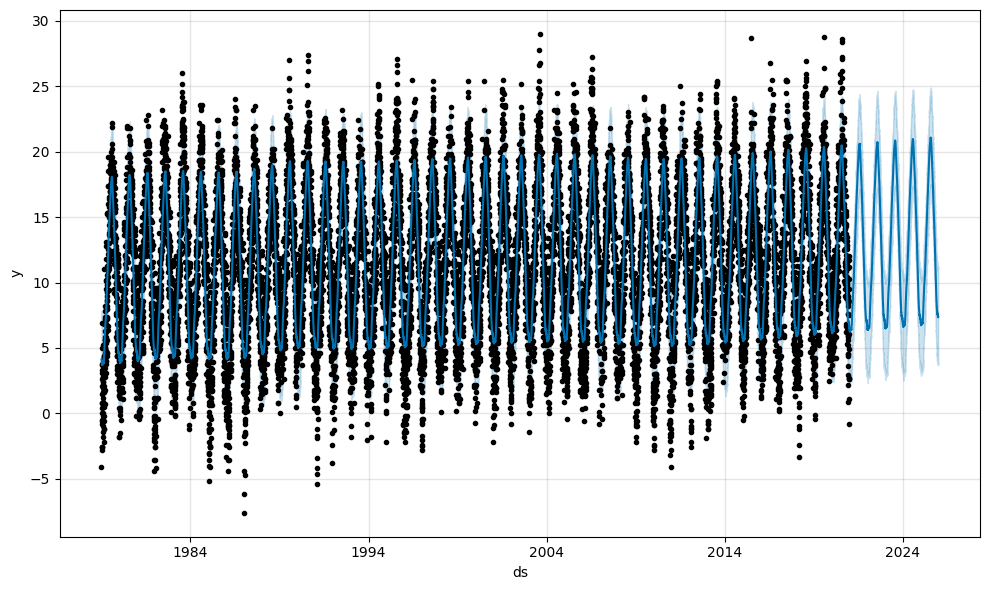

In [24]:
# This shows a narrow prediction line, indicating past trends can be used to make a prediction about average daily temps
fig = model.plot(forecast)

In [25]:
max_df = df[['date', 'max_temp']]
max_df = max_df.rename(columns={'date':'ds', 'max_temp': 'y'})

min_df = df[['date', 'min_temp']]
min_df = min_df.rename(columns={'date':'ds', 'min_temp': 'y'})

In [26]:
model_max = Prophet()
model_max.fit(max_df)
future_max = model_max.make_future_dataframe(periods=1825)

model_min = Prophet()
model_min.fit(min_df)
future_min = model_min.make_future_dataframe(periods=1825)

21:45:41 - cmdstanpy - INFO - Chain [1] start processing
21:45:49 - cmdstanpy - INFO - Chain [1] done processing
21:45:53 - cmdstanpy - INFO - Chain [1] start processing
21:45:57 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
forecast_max = model_max.predict(future_max)

forecast_min = model_min.predict(future_min)

/Users/cattienle/anaconda3/envs/testmojave/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/cattienle/anaconda3/envs/testmojave/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


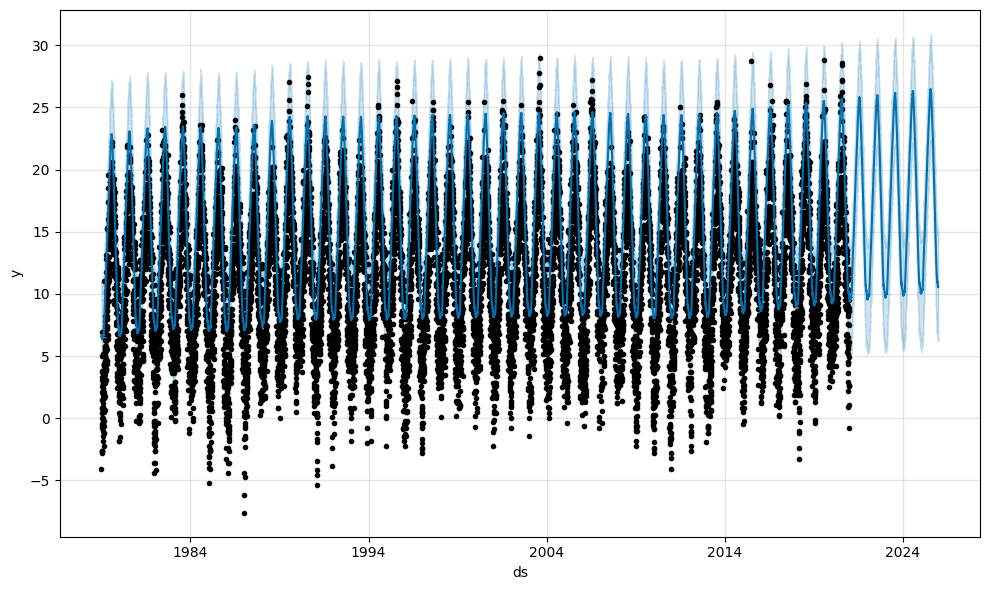

In [28]:
fig_max = model.plot(forecast_max)

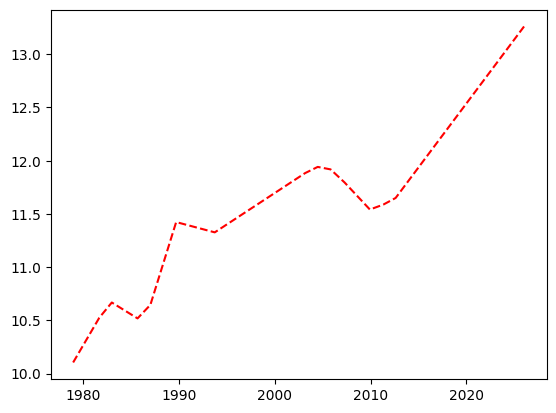

In [29]:
linear_reg_line = plt.plot(forecast['ds'], forecast['trend'], linestyle='--', color='red', label='Linear Regression Line')

In [30]:
forecast = forecast.set_index('ds')

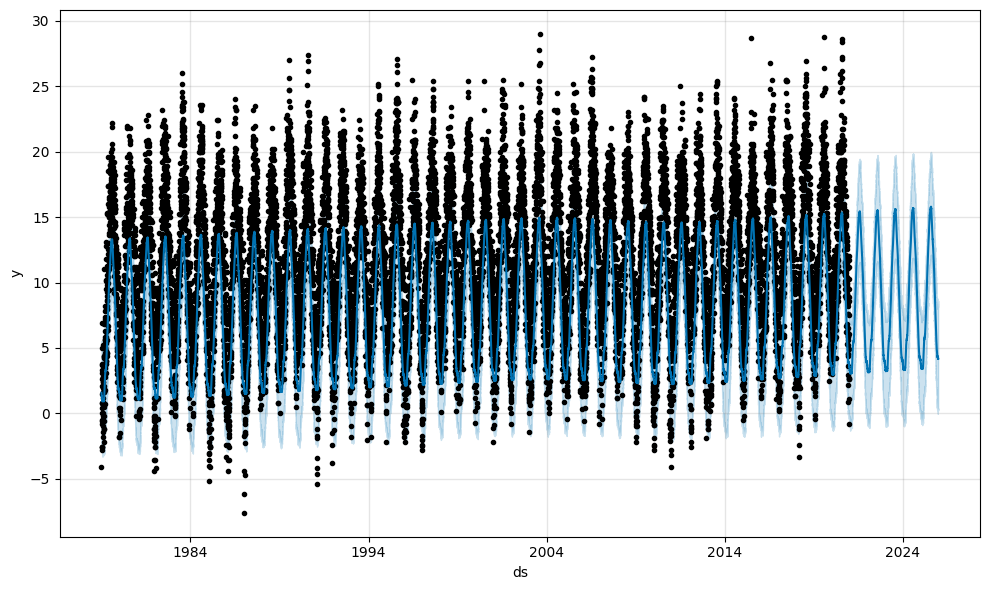

In [31]:
fig_min = model.plot(forecast_min)

<Axes: xlabel='ds'>

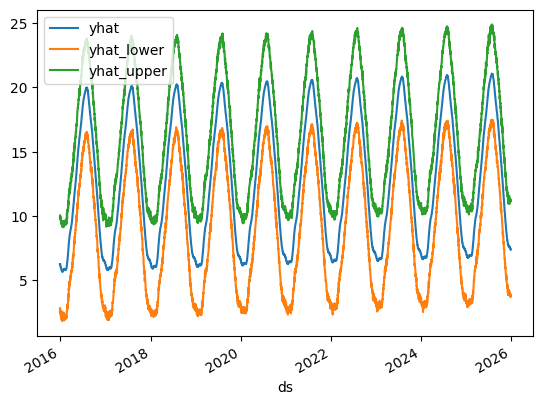

In [32]:
forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-3650:,:].plot()

In [36]:
api = "http://api.openweathermap.org/geo/1.0/direct?q=London&limit=5&appid=07c0b42ecfa9aa300cd0cb0d9c855c2f"

get_api = requests.get(api)
get_api

<Response [200]>

In [37]:
get_api.json()

[{'name': 'London',
  'local_names': {'gd': 'Lunnainn',
   'it': 'Londra',
   'kw': 'Loundres',
   'gu': 'લંડન',
   'tl': 'Londres',
   'fj': 'Lodoni',
   'en': 'London',
   'km': 'ឡុងដ៍',
   'cy': 'Llundain',
   'feature_name': 'London',
   'ku': 'London',
   'ca': 'Londres',
   'ba': 'Лондон',
   'af': 'Londen',
   'uk': 'Лондон',
   'ky': 'Лондон',
   'tw': 'London',
   'kl': 'London',
   'om': 'Landan',
   'ce': 'Лондон',
   'sc': 'Londra',
   'eo': 'Londono',
   'uz': 'London',
   'pl': 'Londyn',
   'mn': 'Лондон',
   'sd': 'لنڊن',
   'wa': 'Londe',
   'ms': 'London',
   'ln': 'Lóndɛlɛ',
   'ml': 'ലണ്ടൻ',
   'ia': 'London',
   'is': 'London',
   'gl': 'Londres',
   'id': 'London',
   'ga': 'Londain',
   'sa': 'लन्डन्',
   'to': 'Lonitoni',
   'na': 'London',
   'ja': 'ロンドン',
   'de': 'London',
   'cv': 'Лондон',
   'ay': 'London',
   'jv': 'London',
   'lb': 'London',
   'yo': 'Lọndọnu',
   'si': 'ලන්ඩන්',
   'bo': 'ལོན་ཊོན།',
   'da': 'London',
   'ee': 'London',
   'so': 'London

In [43]:
london = get_api.json()[0]
london

{'name': 'London',
 'local_names': {'gd': 'Lunnainn',
  'it': 'Londra',
  'kw': 'Loundres',
  'gu': 'લંડન',
  'tl': 'Londres',
  'fj': 'Lodoni',
  'en': 'London',
  'km': 'ឡុងដ៍',
  'cy': 'Llundain',
  'feature_name': 'London',
  'ku': 'London',
  'ca': 'Londres',
  'ba': 'Лондон',
  'af': 'Londen',
  'uk': 'Лондон',
  'ky': 'Лондон',
  'tw': 'London',
  'kl': 'London',
  'om': 'Landan',
  'ce': 'Лондон',
  'sc': 'Londra',
  'eo': 'Londono',
  'uz': 'London',
  'pl': 'Londyn',
  'mn': 'Лондон',
  'sd': 'لنڊن',
  'wa': 'Londe',
  'ms': 'London',
  'ln': 'Lóndɛlɛ',
  'ml': 'ലണ്ടൻ',
  'ia': 'London',
  'is': 'London',
  'gl': 'Londres',
  'id': 'London',
  'ga': 'Londain',
  'sa': 'लन्डन्',
  'to': 'Lonitoni',
  'na': 'London',
  'ja': 'ロンドン',
  'de': 'London',
  'cv': 'Лондон',
  'ay': 'London',
  'jv': 'London',
  'lb': 'London',
  'yo': 'Lọndọnu',
  'si': 'ලන්ඩන්',
  'bo': 'ལོན་ཊོན།',
  'da': 'London',
  'ee': 'London',
  'so': 'London',
  'ur': 'علاقہ لندن',
  'hr': 'London',
  'mt': 

In [46]:
london['lat']

51.5073219

In [47]:
london['lon']

-0.1276474

In [55]:
london_api = "https://history.openweathermap.org/data/2.5/history/city?lat=51.51&lon=-0.13&type=hour&start=1609477200&appid=07c0b42ecfa9aa300cd0cb0d9c855c2f"
london_api

'https://history.openweathermap.org/data/2.5/history/city?lat=51.51&lon=-0.13&type=hour&start=1609477200&appid=07c0b42ecfa9aa300cd0cb0d9c855c2f'

In [56]:
get_api_london = requests.get(london_api)

In [57]:
get_api_london.json()

{'cod': 401,
 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}